## 高斯分布
高斯分布，也称为正态分布，广泛应用于连续型随机变量分布的模型中。
对于一元变量x的情形，高斯分布可以写成如下的形式：
$$\mathcal{N}(x|\mu,\sigma^2)=\frac{1}{(2\pi\sigma^2)^{1/2}}exp\{-\frac{1}{2\sigma^2}(x-\mu)^2\}$$
其中$\mu$是均值，$\sigma^2$是方差。

对于D维向量$\textbf{x}$，多元高斯分布的形式为：
$$\mathcal{N}(\textbf{x}|\textbf{$\mu$},\Sigma)=\frac{1}{(2\pi)^{D/2}|\Sigma|^{1/2}}exp\{-\frac{1}{2}(\textbf{x}-\textbf{$\mu$})^T\Sigma^{-1}(\textbf{x}-\textbf{$\mu$})\}$$
其中，$\textbf{$\mu$}$是一个D维均值向量，$\Sigma$是一个D*D的协方差矩阵，$|\Sigma|$是$\Sigma$的行列式。

##1. 拉普拉斯中心极限定理
拉普拉斯提出的中心极限定理（central limit theorem）告诉我们，对于某些温和的情况，一组随机变量之和（当然也是随机变量）的概率分布随着和式中项的数量的增加而逐渐趋向高斯分布。

**下面的代码说明，多个均匀分布之和的均值的概率分布，随着N的增加，分布趋向于高斯分布**

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from scipy.stats import uniform
from scipy.stats import binom
from scipy.stats import norm as norm_dist

In [5]:
def uniform_central_limit(n, length):
    """
    @param:
    n:计算rv的n次平均值, length：平均随机变量的样本数
    @return:
    rv_mean: 长度为length的数组，它是平均随机变量的样本
    gaussian: 对data进行拟合所得到的高斯分布
    """
    rv_mean = np.zeros(length)
    for i in xrange(n):
        rv = uniform.rvs(size=length)
        rv_mean = rv_mean + rv
    rv_mean = rv_mean / n
    gaussian_params = norm_dist.fit(rv_mean)
    gaussian = norm_dist(gaussian_params[0], gaussian_params[1])
    return rv_mean, gaussian

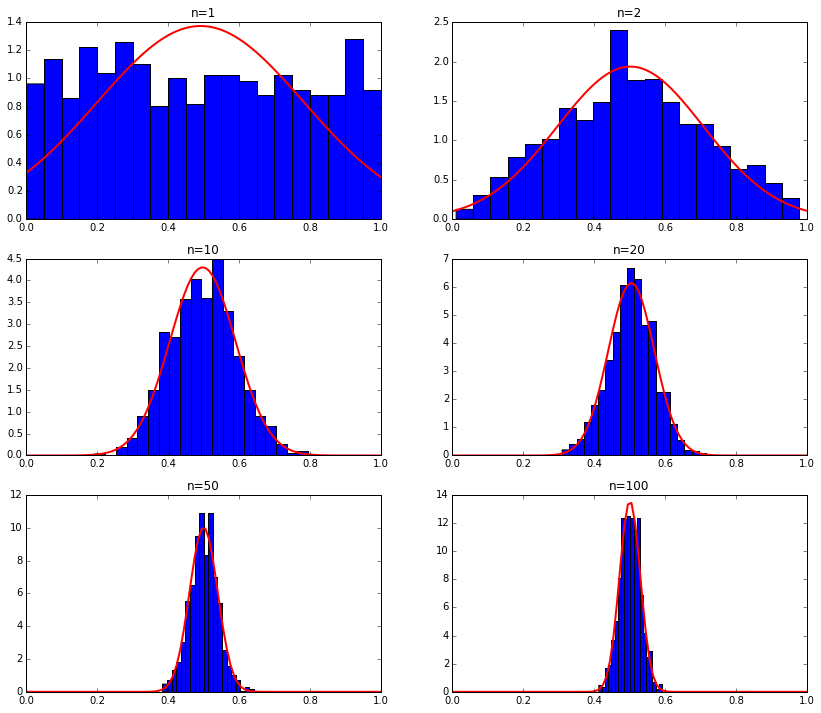

In [6]:
fig = plt.figure(figsize=(14,12))
x = np.linspace(0,1,100)
for i, n in enumerate([1,2,10,20,50,100]):
    ax = fig.add_subplot(3,2,i+1)
    data, gaussian = uniform_central_limit(n, 1000)
    ax.hist(data, bins=20, normed=True)
    plt.plot(x, gaussian.pdf(x), "r", lw=2)
    plt.title("n=%d" % n)
    
plt.show()

##2. 高斯分布的几何形式

高斯对于x的依赖体现在二次型$\Delta^2=(\textbf{x}-\textbf{$\mu$})^T\Sigma^{-1}(\textbf{x}-\textbf{$\mu$})$上。$\Delta$被称为$\textbf{$\mu$}$和$\textbf{x}$之间的马氏距离(Mahalanobis distance)。当$\Sigma$是单位矩阵时，就变成了欧式距离。对于x空间中这个二次型事常数的曲面，高斯分布也是常数。

现在考虑协方差矩阵的特征向量方程$$\Sigma\textbf{$\mu$}_i=\lambda_i\textbf{$\mu$}_i$$
其中$i=1,...,D$。

**由于$\Sigma$是实对称矩阵，因此它的特征值也是实数，并且特征向量可以被选成是单位正交的。**

协方差矩阵可以表示成特征向量的展开形式$$\Sigma=\sum_\limits{i=1}^D\lambda_i\textbf{u}_i\textbf{u}_i^T$$
协方差矩阵的逆矩阵可以表示为$$\Sigma^{-1}=\sum_\limits{i=1}^D\frac{1}{\lambda_i}\textbf{u}_i\textbf{u}_i^T$$

于是二次型就变成了$$\Delta^2=\sum_\limits{i=1}^D\frac{y_i^2}{\lambda_i}$$
其中定义$y_i=\textbf{u}_i^T(\textbf{x}-\textbf{$\mu$})$。

我们把$\{y_i\}$表示成单位正交向量$\textbf{u}_i$关于原始的$x_i$坐标经过平移和旋转后形成的新的坐标系。

定义$\textbf{y}=(y_1,...,y_D)^T$，我们有$$\textbf{y}=\textbf{U}(\textbf{x}-\textbf{$\mu$})$$
其中$\textbf{U}$是一个矩阵，它的行是向量$\textbf{u}_i^T$。

**如果所有的特征值$\lambda_i$都是正数，那么这些曲面表示椭球面，椭球中心位于$\textbf{$\mu$}$，椭球的轴的方向沿着$\textbf{u}_i$，沿着轴向的缩放因子为$\lambda_i^{\frac{1}{2}}$。如下图所示：**

![](http://research.microsoft.com/en-us/um/people/cmbishop/prml/prmlfigs-jpg/Figure2.7.jpg)

###高斯分布的局限

高斯分布的局限主要体现在其**自由参数的数量和单峰分布**上。

对于一般的协方差矩阵，其参数的总数随着维度D的增长呈平方的方式增长，为了简化参数，可以将协方差矩阵约束成对角矩阵或者各向同性协方差矩阵（正比于单位矩阵），这样虽然限制了概率分布的自由度的数量，并且很容易求协方差矩阵的逆矩阵，但却**大大限制了概率密度的形式，限制了描述模型中相关性的能力**。

高斯分布本质上是单峰的（只有一个最大值），而不能很好近似多峰分布。后面，我们会引入潜在变量来解决这一问题。**通过引入离散型潜在变量，相当多的多峰分布可以使用混合高斯分布来描述；通过引入连续型潜在变量可以产生出一种模型，该模型的自由参数可以被控制成与数据空间的维度D无关，同时仍然允许模型描述数据集里主要的相关性关系。**

###不同形式的协方差矩阵对应的概率密度曲线

In [7]:
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D

In [8]:
def plot_2d_normal(mux, muy, sigmaxx, sigmayy, sigmaxy):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot()
    x = np.arange(0, 5, 0.1)
    y = np.arange(0, 5, 0.1)
    x, y = np.meshgrid(x, y)
    z = mlab.bivariate_normal(x, y, sigmaxx, sigmayy, mux, muy, sigmaxy)
    ret = plt.contourf(x, y, z, cmap=plt.get_cmap('coolwarm'))
    fig.colorbar(ret, shrink=0.5, aspect=5)
    plt.show()

**下面是一般形式的协方差矩阵对应的密度轮廓线，协方差矩阵有D(D+1)/2个独立参数，参数的总数随着D以平方的方式增长，大矩阵计算和求逆困难。**

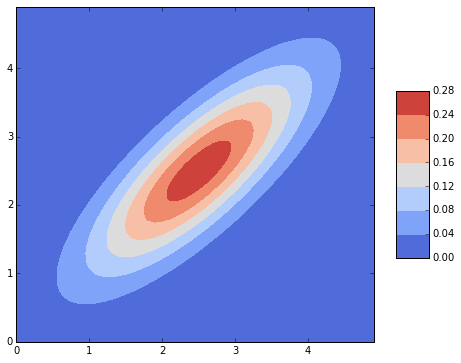

In [9]:
plot_2d_normal(2.5, 2.5, 1.0, 1.0, 0.8)

**下面协方差矩阵是对角矩阵的情况，椭圆的轮廓线与坐标轴对齐。概率密度模型中有总数为2D个独立参数。**

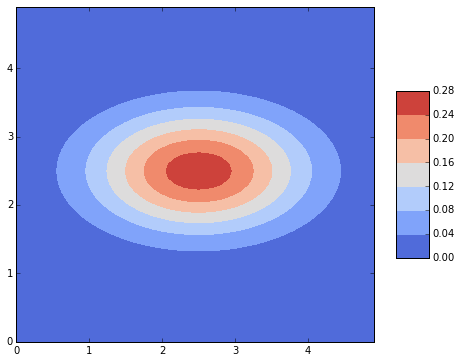

In [10]:
plot_2d_normal(2.5, 2.5, 1.0, 0.6, 0)

**下面协方差矩阵正比于单位矩阵，该协方差矩阵又被称为各向同性协方差矩阵，轮廓线是同心圆。这使得模型有D+1个独立的参数。**

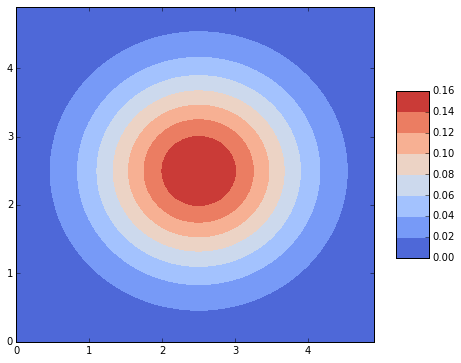

In [11]:
plot_2d_normal(2.5, 2.5, 1.0, 1.0, 0)

##参考资料
[漫谈正态分布的生成](http://cos.name/tag/%E4%B8%AD%E5%BF%83%E6%9E%81%E9%99%90%E5%AE%9A%E7%90%86/)